In [1]:
#Some useful imports
import numpy as np
import pims
import skimage.filters as filters
import os
import matplotlib.pyplot as plt

In [2]:
folder_name = '/Users/akennard/Code/Kennard_ImageSequences_forPythonClub/'
file_name = '20190312_40x_ebgPositive_Wounding_1_MMStack_Pos0.ome-2.tif'
I = pims.open(os.path.join(folder_name,file_name))

In [3]:
#How many images are in the sequence?
num_frames = len(I)
xy_shapes = I[0].shape
print('Number of frames: {}; x-y dimensions: {}'.format(num_frames,xy_shapes))

Number of frames: 213; x-y dimensions: (512, 512)


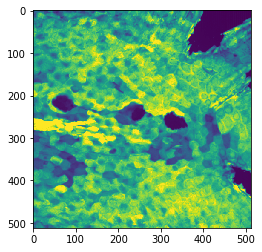

In [4]:
# Create a maximum intensity projection
max_z_image = np.zeros(xy_shapes)
for im in I:
    max_z_image = np.maximum(max_z_image,im)
plt.imshow(max_z_image)
plt.show()

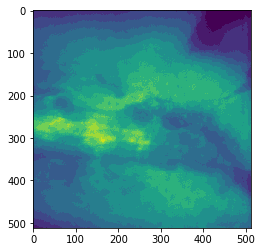

In [5]:
# Create a median projection
full_z_stack = np.zeros(xy_shapes + (num_frames,))
for k,im in enumerate(I):
    full_z_stack[:,:,k] = im;
median_z_image = np.median(full_z_stack,axis=2)
plt.imshow(median_z_image)
plt.show()

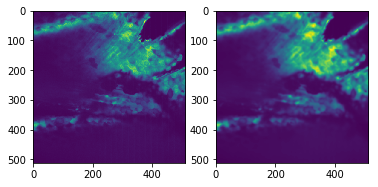

In [6]:
# Apply a gaussian filter to the full z stack
full_stack_smooth = filters.gaussian(full_z_stack,sigma=(2,2,1))
fig,ax = plt.subplots(nrows=1,ncols=2)
z_to_show = 100
ax[0].imshow(full_z_stack[:,:,z_to_show])
ax[1].imshow(full_stack_smooth[:,:,z_to_show])
plt.show()
